In [4]:
# for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# for regression analysis 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [5]:
data = pd.read_csv('Data/survey_results_public.csv')
data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


### Preliminary analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [7]:
# shape of this data set 
print(f'rows: {data.shape[0]}, columns: {data.shape[1]}')

rows: 64461, columns: 61


In [8]:
# We want tp drop some of NaN value 
# percentage of null values in each columns?
data.isnull().sum()/data.shape[0]

Respondent            0.000000
MainBranch            0.004638
Hobbyist              0.000698
Age                   0.294985
Age1stCode            0.101782
                        ...   
WebframeWorkedWith    0.344115
WelcomeChange         0.182715
WorkWeekHrs           0.361614
YearsCode             0.105133
YearsCodePro          0.280976
Length: 61, dtype: float64

In [9]:
# drop rows without compensation total 
comp_2020 = data.dropna(subset = ['ConvertedComp'])
comp_2020.shape[0]

34756

### Field of study

In [37]:
comp_2020['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering                   20081
Another engineering discipline (such as civil, electrical, mechanical, etc.)       2931
Information systems, information technology, or system administration              2545
A natural science (such as biology, chemistry, physics, etc.)                      1485
Mathematics or statistics                                                          1199
Web development or web design                                                       956
A business discipline (such as accounting, finance, marketing, etc.)                825
A humanities discipline (such as literature, history, philosophy, etc.)             719
A social science (such as anthropology, psychology, political science, etc.)        620
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      508
I never declared a major                                                            232
A health science (such as nursin

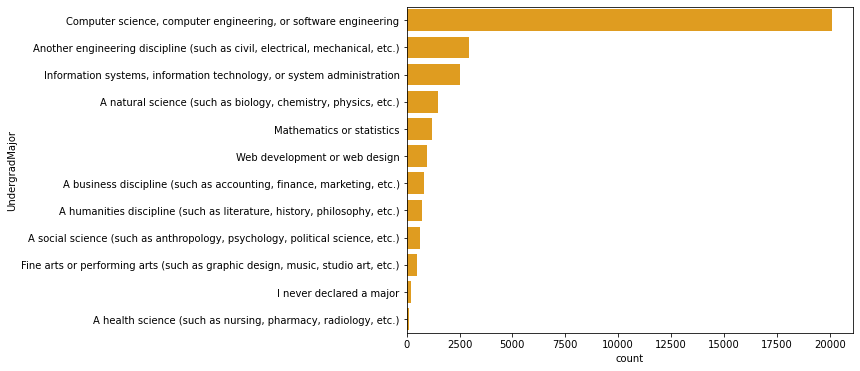

In [36]:

plt.figure(figsize=(8,6))

sns.countplot(y = 'UndergradMajor', data = comp_2020, color = 'orange', order = comp_2020['UndergradMajor'].value_counts().index)

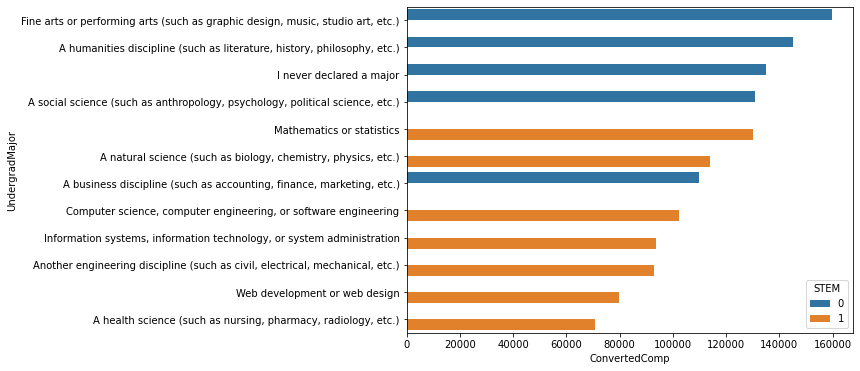

In [79]:
plt.figure(figsize=(8,6))

sns.barplot(
    x = 'ConvertedComp',
    y = 'UndergradMajor',
    data = comp_stem,
    hue = 'STEM'
)

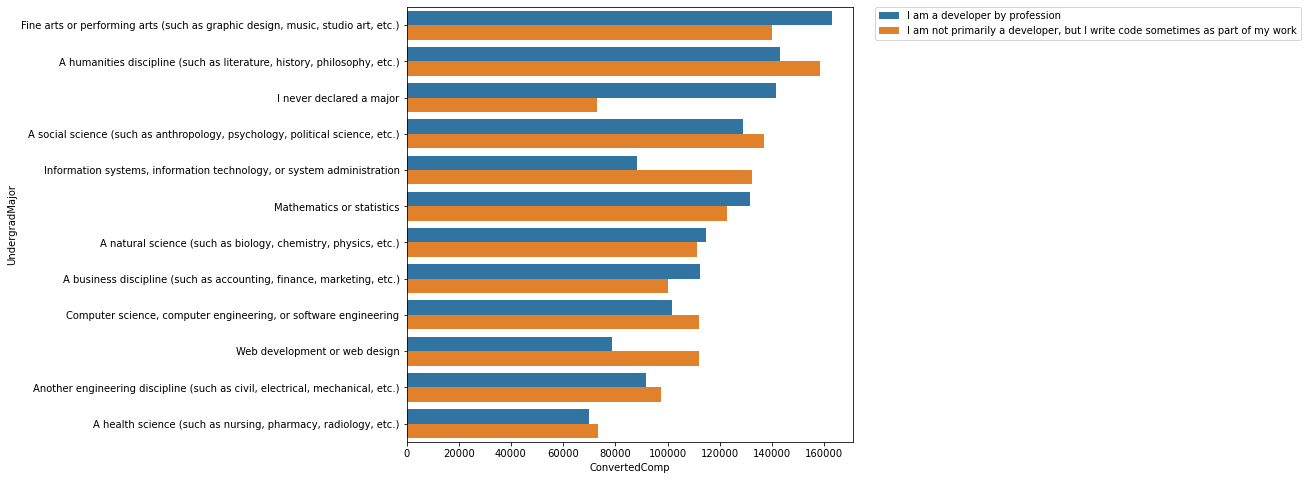

In [107]:
plt.figure(figsize=(8,8))

sns.barplot(
    x = 'ConvertedComp',
    y = 'UndergradMajor',
    data = comp_stem,
    hue = 'MainBranch'
)

#plt.legend(loc='best', bbox_to_anchor=(2, 1), )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

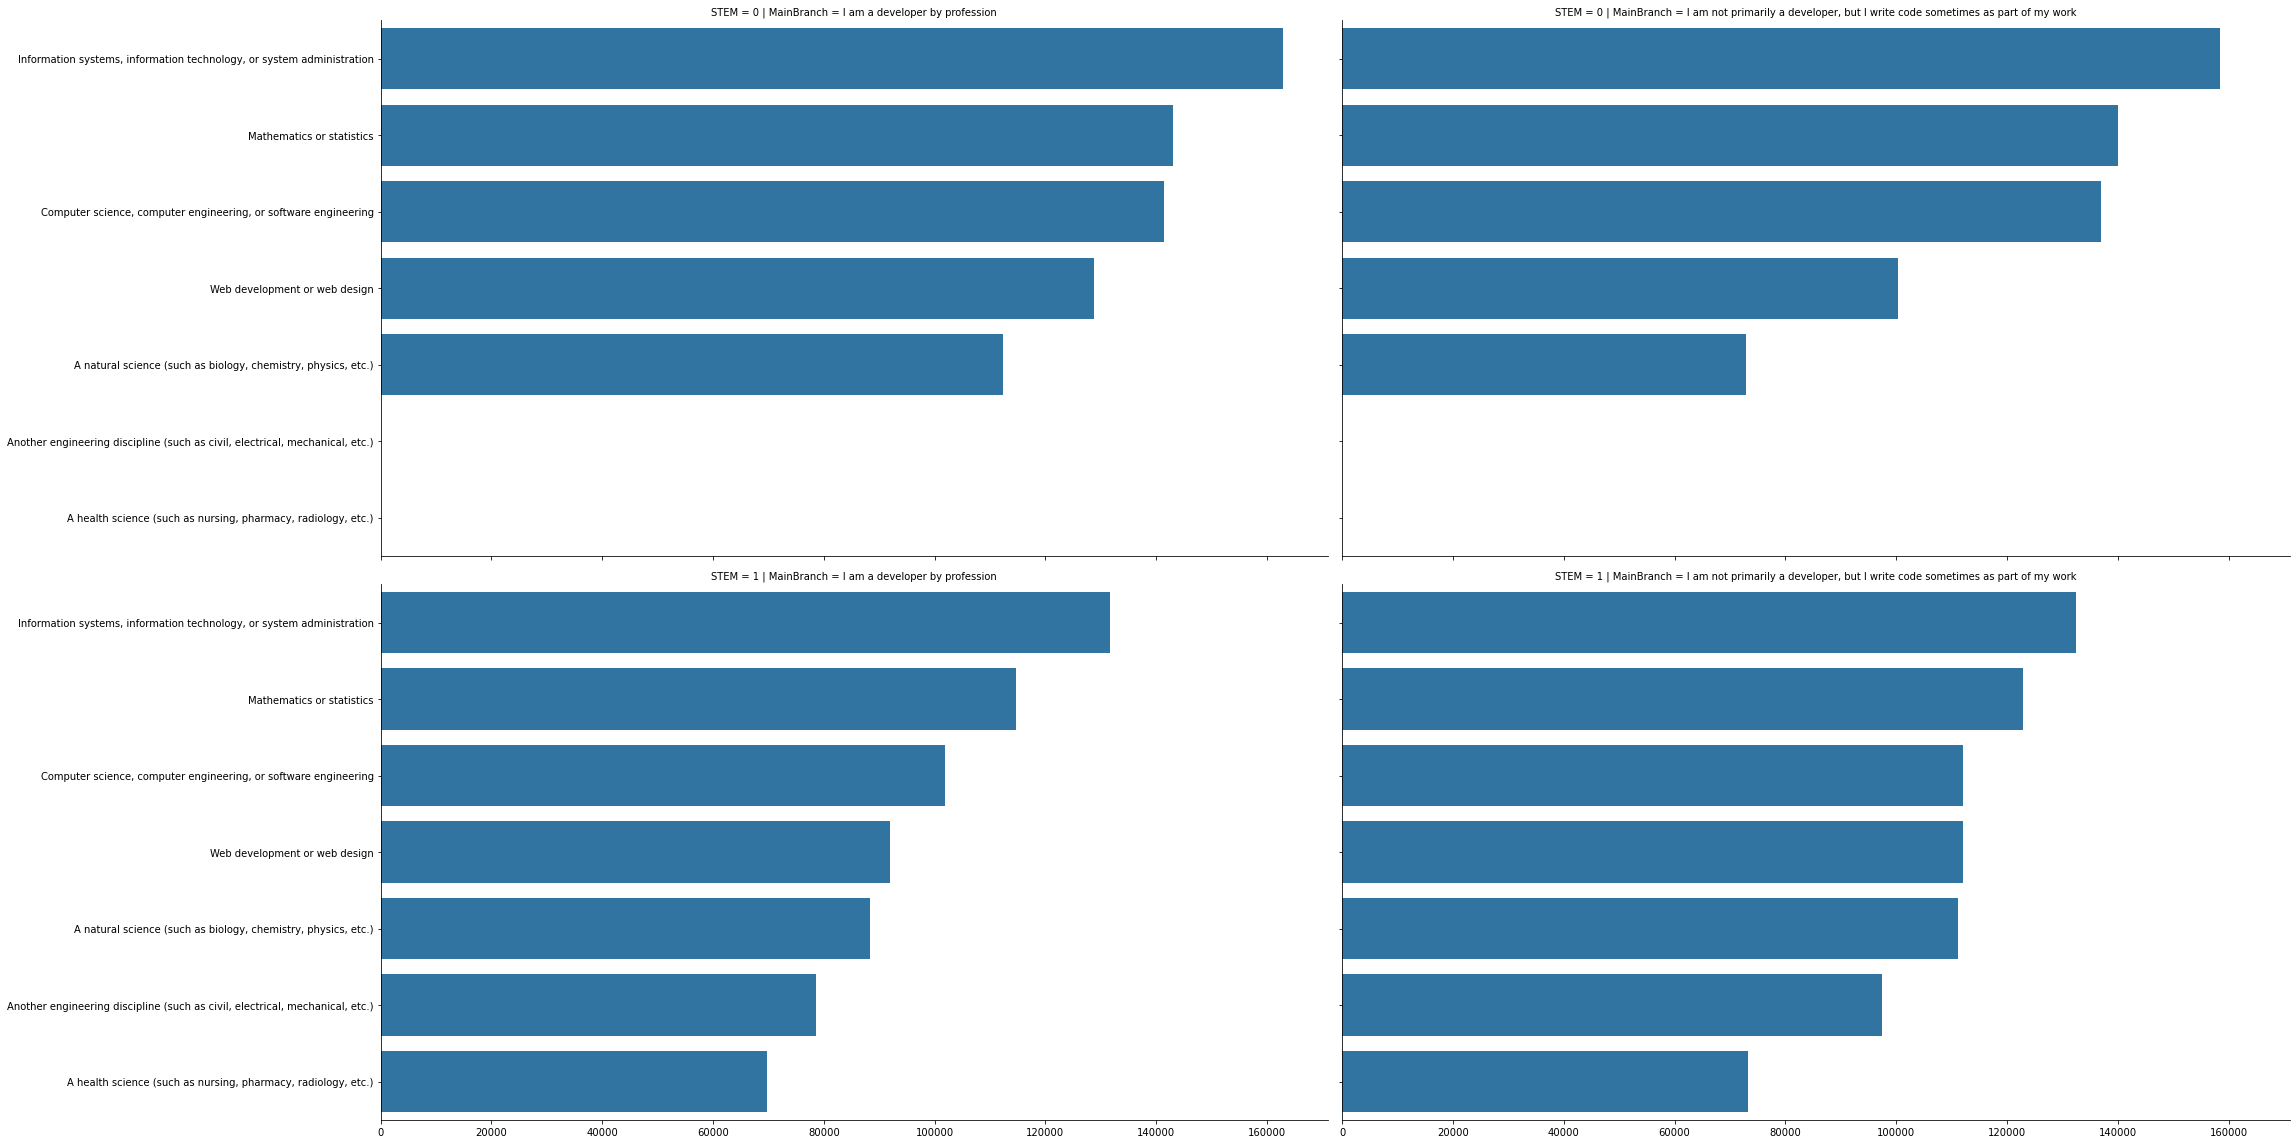

In [137]:

g = sns.FacetGrid(comp_stem, col = 'MainBranch',row="STEM",height=8,aspect=0)
g.map_dataframe(sns.barplot, x= 'ConvertedComp', y='UndergradMajor')


In [41]:
# STEM major?

major_1 = [
    'Computer science, computer engineering, or software engineering',
    'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
    'Information systems, information technology, or system administration',
    'A natural science (such as biology, chemistry, physics, etc.)',
    'Mathematics or statistics',
    'A health science (such as nursing, pharmacy, radiology, etc.)',
    'Web development or web design'
]

def major_stem(field):
    if field in major_1:
        return 1 
    else:
        return 0

comp_2020['STEM'] = comp_2020['UndergradMajor'].apply(major_stem)
# abour over 81% developers are directly from stem major; what they care most when choosing a new job?

<ipython-input-41-53752722d06b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_2020['STEM'] = comp_2020['UndergradMajor'].apply(major_stem)


### Job factors

In [10]:
# What people care most when they compare two new offers?
# Respondent can submit multiple answers for this question. Therefoere, we need to break into these fields to see how they distribute

comp_2020['JobFactors'].value_counts()


Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Remote work options                                2019
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Office environment or company culture              1857
Languages, frameworks, and other technologies I’d be working with;Office environment or company culture;Opportunities for professional development    1749
Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working with;Opportunities for professional development         1143
Flex time or a flexible schedule;Remote work options;Office environment or company culture                                                            1131
                                                                                                                                                      ... 
Diversity of the company or organization;Flex time or a flexible sched

In [11]:
factors = comp_2020['JobFactors'].value_counts().reset_index()
factors.rename(columns={'index': 'factor', 'JobFactors': 'count'}, inplace=True)

In [12]:
# Fromm schema file, we get all possible options of jab factors 

factor_list = [
    'Remote work options',
    'Office environment or company culture','Financial performance or funding status of the company or organization', 
    'Opportunities for professional development','Diversity of the company or organization', 
    'How widely used or impactful my work output would be', 'Industry that I’d be working in', 
    'Specific department or team I’d be working on', 'Flex time or a flexible schedule', 
    'Languages, frameworks, and other technologies I’d be working with','Family friendliness'
]

# now we parse the factor column; I'd borrow one of useful functions defined by Udacity's data science study materials 

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row, add the devs
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    #clean up the resulting dataframe8
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

parsed_factor = total_count(factors,'factor','count', factor_list)

In [540]:
#parsed_factor.set_index('factor', inplace = True)

In [13]:
parsed_factor['pct'] = parsed_factor['count']/parsed_factor['count'].sum()*100

In [14]:
parsed_factor

,factor,count,pct
9,"Languages, frameworks, and other technologies ...",17328,17.698247
1,Office environment or company culture,15143,15.466560
8,Flex time or a flexible schedule,15032,15.353189
3,Opportunities for professional development,13336,13.620950
0,Remote work options,11719,11.969400
5,How widely used or impactful my work output wo...,6887,7.034155
6,Industry that I’d be working in,4807,4.909711
10,Family friendliness,3970,4.054827
7,Specific department or team I’d be working on,3754,3.834212
2,Financial performance or funding status of the...,3720,3.799485


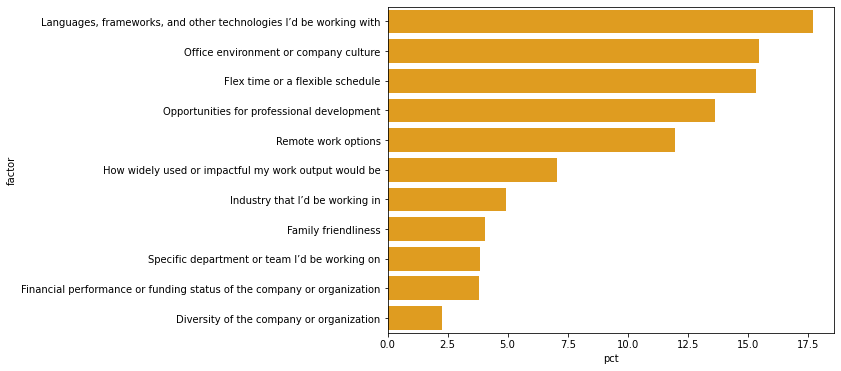

In [15]:

plt.figure(figsize=(8,6))

sns.barplot(
    x = 'pct',
    y = 'factor',
    data = parsed_factor,
    color = 'orange'
)

In [83]:
# Do those STEM and non-STEM background developers earn different levels of compensation?

stem_df = comp_2020.loc[comp_2020['STEM'] == 1]
non_stem_df = comp_2020[comp_2020['STEM'] != 1]

stem_c = stem_df.groupby('UndergradMajor').agg({'ConvertedComp':'mean'}).sort_values(by = 'ConvertedComp', ascending = False)
stem_c

,ConvertedComp
UndergradMajor,
Mathematics or statistics,130102.592994
"A natural science (such as biology, chemistry, physics, etc.)",113949.783838
"Computer science, computer engineering, or software engineering",102308.640904
"Information systems, information technology, or system administration",93816.513949
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",92776.573866
Web development or web design,79894.124477
"A health science (such as nursing, pharmacy, radiology, etc.)",70738.669291


In [84]:
non_stem_c = non_stem_df.groupby('UndergradMajor').agg({'ConvertedComp':'mean'}).sort_values(by = 'ConvertedComp', ascending = False)
non_stem_c

,ConvertedComp
UndergradMajor,
"Fine arts or performing arts (such as graphic design, music, studio art, etc.)",159630.374016
"A humanities discipline (such as literature, history, philosophy, etc.)",145240.655076
I never declared a major,134906.594828
"A social science (such as anthropology, psychology, political science, etc.)",130689.137097
"A business discipline (such as accounting, finance, marketing, etc.)",109906.890909


In [85]:
comp_stem = comp_2020.groupby(['STEM','UndergradMajor','MainBranch']).agg({'ConvertedComp':'mean'}).sort_values(by = 'ConvertedComp', ascending = False).reset_index()
comp_stem

,STEM,UndergradMajor,MainBranch,ConvertedComp
0,0,Fine arts or performing arts (such as graphic ...,I am a developer by profession,162858.770642
1,0,"A humanities discipline (such as literature, h...","I am not primarily a developer, but I write co...",158445.320000
2,0,"A humanities discipline (such as literature, h...",I am a developer by profession,143107.429725
3,0,I never declared a major,I am a developer by profession,141413.300000
4,0,Fine arts or performing arts (such as graphic ...,"I am not primarily a developer, but I write co...",140080.638889
5,0,"A social science (such as anthropology, psycho...","I am not primarily a developer, but I write co...",137041.938356
6,1,"Information systems, information technology, o...","I am not primarily a developer, but I write co...",132389.252336
7,1,Mathematics or statistics,I am a developer by profession,131672.756345
8,0,"A social science (such as anthropology, psycho...",I am a developer by profession,128732.367089
9,1,Mathematics or statistics,"I am not primarily a developer, but I write co...",122875.439252


In [42]:
stem_1 = comp_2020[comp_2020['STEM'] == 1]
stem_0 = comp_2020[comp_2020['STEM'] == 0]

def count_factor(df):
    df_new = df['JobFactors'].value_counts().reset_index()
    df_new.rename(columns={'index': 'factor', 'JobFactors': 'count'}, inplace=True)
    df_new = total_count(df_new, 'factor', 'count', factor_list)
    df_new['pct'] = df_new['count']/df_new['count'].sum()*100

    return df_new

stem_1_count = count_factor(stem_1)
stem_0_count = count_factor(stem_0)

In [43]:
stem_count = stem_1_count.merge(stem_0_count, left_on='factor', right_on='factor')
stem_count.columns = ['factor','stem_1_count', 'stem_1_pct','stem_0_count','stem_0_pct']
stem_count['pct_diff'] = stem_count['stem_1_pct'] - stem_count['stem_0_pct']
stem_count
stem_count.style.bar(subset=['pct_diff'], align='mid', color=['#d65f5f', '#5fba7d'])

,factor,stem_1_count,stem_1_pct,stem_0_count,stem_0_pct,pct_diff
0,"Languages, frameworks, and other technologies I’d be working with",14772,17.861072,2556,16.812471,1.048601
1,Office environment or company culture,12859,15.548032,2284,15.023351,0.524682
2,Flex time or a flexible schedule,12802,15.479113,2230,14.668158,0.810955
3,Opportunities for professional development,11336,13.706547,2000,13.155298,0.551249
4,Remote work options,9651,11.669186,2068,13.602578,-1.933393
5,How widely used or impactful my work output would be,5888,7.119279,999,6.571071,0.548208
6,Industry that I’d be working in,4020,4.860649,787,5.176610,-0.315961
7,Family friendliness,3304,3.994922,666,4.380714,-0.385793
8,Financial performance or funding status of the company or organization,3174,3.837737,546,3.591396,0.246340
9,Specific department or team I’d be working on,3160,3.820809,594,3.907124,-0.086315


### Extra practice: linear modeling

In [49]:
# How a STEM degree affect compensation? 
pct_null = comp_2020.isnull().sum()/comp_2020.shape[0]
pct_null.index[pct_null > 0.16]
# I decide to drop features that have over 15% null values, but I also think sexuality might be a good feature
# to investigate; I there fore decide to drop all data features that thave over 16% null
# pct_null[pct_null > 0.16].index
# comp_2020.dropna(subset = pct_null[pct_null > 0.16].index, how = 'any')

Index(['DatabaseDesireNextYear', 'MiscTechDesireNextYear',
       'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear',
       'NEWPurchaseResearch', 'SOPartFreq', 'WebframeDesireNextYear',
       'WebframeWorkedWith'],
      dtype='object')

In [549]:
comp_2020.shape

(34756, 62)

In [550]:

# less than 1 year ≈ 1
# more than 50 years ≈ 51


comp_2020['YearsCodePro'] = comp_2020['YearsCodePro'].replace({'Less than 1 year':0, 'More than 50 years':51}).astype('float')
comp_2020['YearsCode'] = comp_2020['YearsCode'].replace({'Less than 1 year':0, 'More than 50 years':51}).astype('float')
comp_2020['Age1stCode'] = comp_2020['Age1stCode'].replace({'Younger than 5 years' :4, 'Older than 85':86}).astype('float')


In [72]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''

    # drop rows without converted comp
    df = df.dropna(subset = ['ConvertedComp'], axis = 0)
    y = df['ConvertedComp'][:5001]
    
    # drop columns with 16% missing values 
    nulls = df.isnull().sum()/df.shape[0]
    #df = df.drop(nulls.index[nulls > 0.16], axis=1)

    df = df.drop(['Respondent','CompTotal','ConvertedComp',
    'DatabaseDesireNextYear', 'MiscTechDesireNextYear','MiscTechWorkedWith', 
    'NEWCollabToolsDesireNextYear','NEWPurchaseResearch', 'SOPartFreq', 'WebframeWorkedWith',
    'NEWJobHunt','NEWJobHuntResearch','LanguageDesireNextYear','LanguageWorkedWith',
    'NEWCollabToolsWorkedWith','NEWStuck','NEWSOSites','UndergradMajor','NEWOffTopic','NEWPurpleLink',
    'PlatformDesireNextYear','PlatformWorkedWith','MiscTechDesireNextYear', 'MiscTechWorkedWith','NEWDevOps',
    #'SurveyEase','SurveyLength','WelcomeChange',
    #'WebframeWorkedWith','WebframeDesireNextYear',
    #'DevType','JobFactors','DatabaseWorkedWith','CurrencyDesc','CurrencySymbol','Ethnicity'
                 ],axis = 1)

    # Fill numeric column null with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        if col == 'STEM':
            df[col].fillna((df[col].mode()), inplace=True)
        else:
            df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df.iloc[:5001,:]
    return X, y
    
#Use the function to create X and y
X, y = clean_data(comp_2020)  

In [689]:
# check if there are any null values in X
X.columns[X.isnull().mean() != 0]

Index([], dtype='object')

In [80]:
# now we build the model 
X.shape

(5001, 12179)

In [81]:
# initial model 
model = LinearRegression(normalize=True)

# # train, test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

# fit the model
model.fit(X_train,y_train)

# # predict
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

# # score 
r2_score_test = r2_score(y_test,y_predict_test)
r2_score_train = r2_score(y_train,y_predict_train)
print(f'Test r2:{r2_score_test}, Train r2 {r2_score_train}')

Test r2:-1.5406806129860166e+28, Train r2 -21.28478841243745


In [692]:
X.head(10)

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro,STEM,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",Hobbyist_Yes,CompFreq_Weekly,...,"SOComm_No, not really",SOComm_Not sure,"SOComm_Yes, definitely","SOComm_Yes, somewhat",SOVisitFreq_A few times per week,SOVisitFreq_Daily or almost daily,SOVisitFreq_I have never visited Stack Overflow (before today),SOVisitFreq_Less than once per month or monthly,SOVisitFreq_Multiple times per day,Trans_Yes
7,36.0,12.0,116000.0,39.0,17.0,13.0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
9,22.0,14.0,32315.0,36.0,8.0,4.0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
10,23.0,13.0,40070.0,40.0,10.0,2.0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
11,49.0,42.0,14268.0,40.0,7.0,7.0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
12,53.0,14.0,38916.0,36.0,35.0,20.0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
13,27.0,13.0,66000.0,40.0,5.0,1.0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
15,45.0,8.0,108576.0,50.0,37.0,23.0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
16,25.0,14.0,79000.0,40.0,7.0,3.0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
17,32.0,12.0,1260000.0,45.0,19.0,12.0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
18,24.0,15.0,83400.0,35.0,9.0,3.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [693]:
coefs = pd.DataFrame()
coefs['est_int'] = X_train.columns
coefs['coefs'] = model.coef_
coefs['abs_coefs'] = np.abs(model.coef_)
coefs = coefs.sort_values('abs_coefs', ascending=False)

In [694]:
coefs.head(20)

,est_int,coefs,abs_coefs
107,Country_Namibia,9.145248e+04,9.145248e+04
112,Country_Niger,7.201342e+04,7.201342e+04
91,Country_Lesotho,1.732173e+01,1.732173e+01
2,ConvertedComp,1.000000e+00,1.000000e+00
35,Country_Burkina Faso,2.211937e-08,2.211937e-08
27,Country_Benin,1.296563e-08,1.296563e-08
26,Country_Belize,9.473492e-09,9.473492e-09
20,Country_Bahamas,-6.997323e-09,6.997323e-09
166,Country_Yemen,5.995512e-09,5.995512e-09
66,Country_Guyana,-5.500737e-09,5.500737e-09


In [695]:
coefs.loc[coefs['est_int'] == 'STEM',:]

,est_int,coefs,abs_coefs
6,STEM,-6.153926e-11,6.153926e-11


In [701]:
# Job factor and compensayion analysis
comp_2020['JobSat'].value_counts()



Very satisfied                        11312
Slightly satisfied                    10785
Slightly dissatisfied                  5746
Neither satisfied nor dissatisfied     4066
Very dissatisfied                      2792
Name: JobSat, dtype: int64